In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [20]:
IMGIDX = 0

In [21]:
# Load Ground Truth
af_dset = h5py.File("../data/dataset_rgb_nir_test.hdf5","r")
af_dset["GT"].shape
y = af_dset["GT"][IMGIDX]

In [5]:
# Load Prediction Result
y_pred = np.zeros((2500,224,224))

# Reshape prediction

In [36]:
# Reshape Prediction
y_pred = np.zeros((2500,224,224))
y_pred = y_pred.reshape(50,50,224,224)
y_pred = np.swapaxes(y_pred, 1, 2)
y_pred = y_pred.reshape(50*224,50*224)
y_pred = y_pred[:y.shape[0], :y.shape[1]]
y_err = y - y_pred

# Visualize

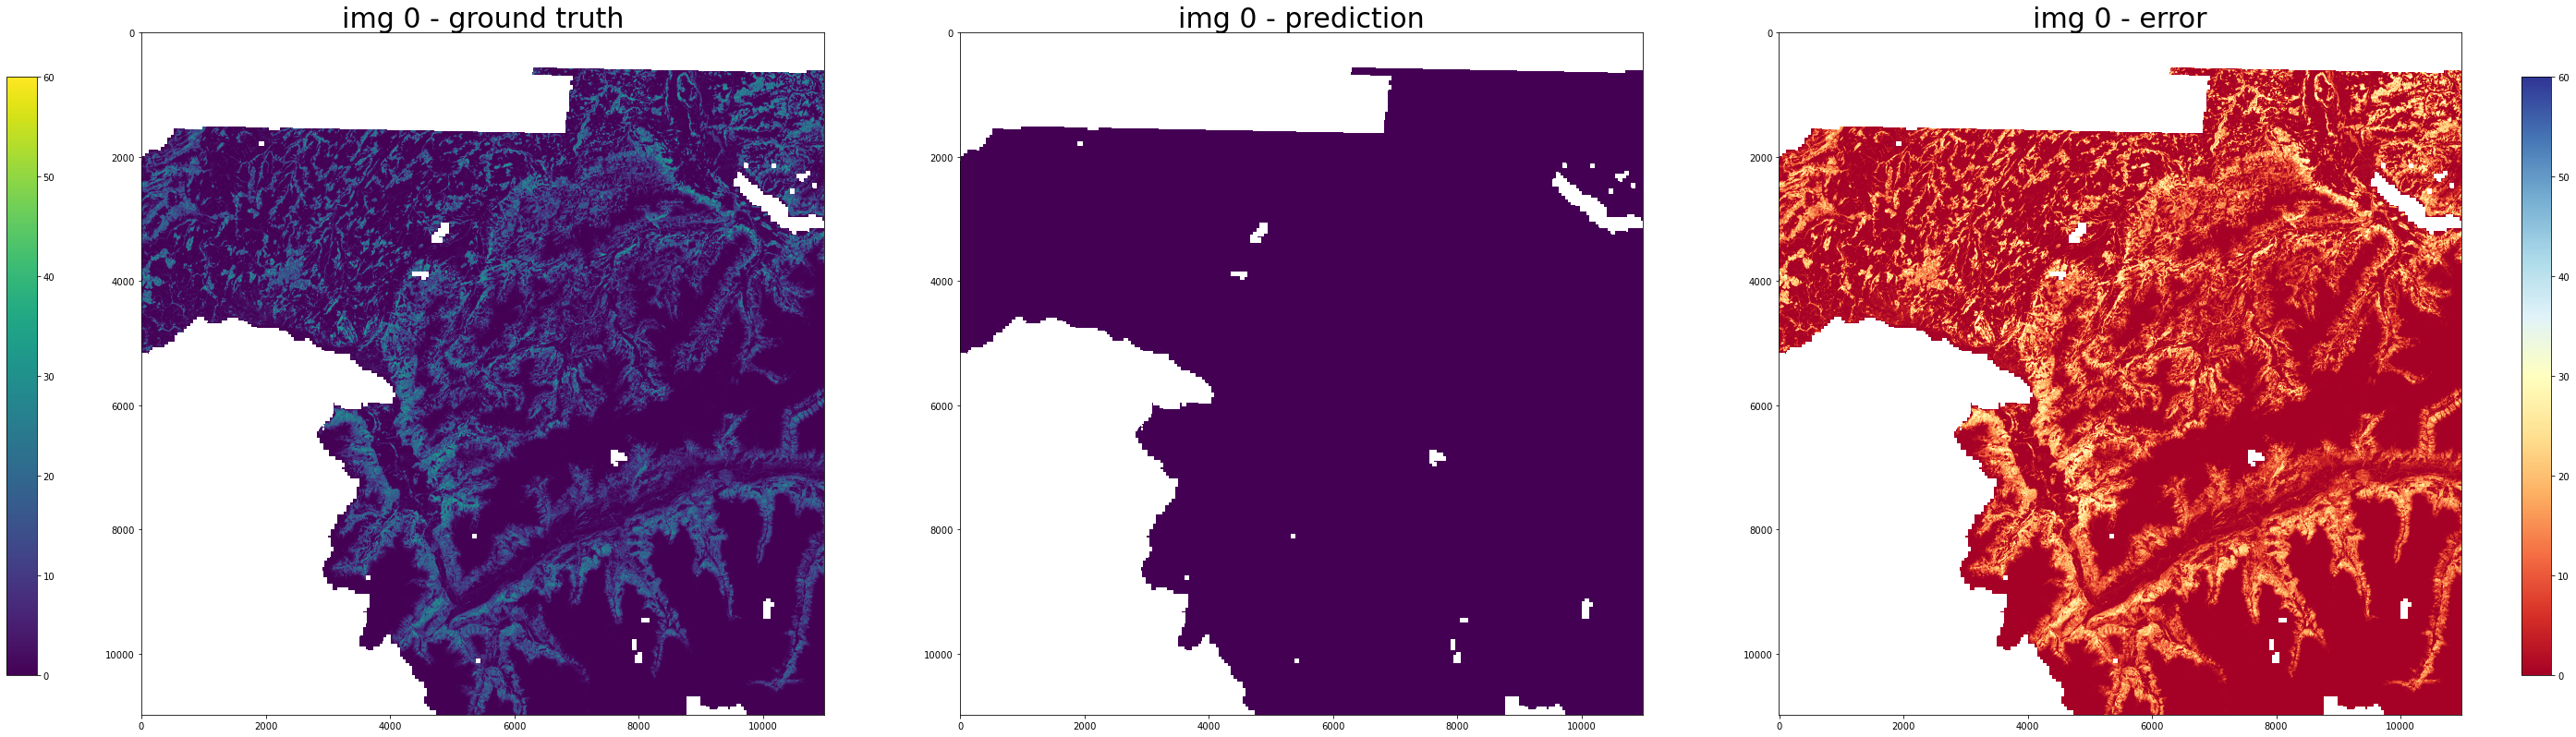

In [41]:
# Visualize Ground Truth and Prediction
nodata_mask = y <= -1.0
data = np.ma.masked_where(nodata_mask, y)
data_pred = np.ma.masked_where(nodata_mask, y_pred)
data_err = np.ma.masked_where(nodata_mask, y_err)

fig, axes = plt.subplots(1,3, figsize=(45,15))
cbar = axes[0].imshow(data, vmin=0., vmax=60.0)
axes[0].set_title(f"img {IMGIDX} - ground truth", fontsize=30)
axes[1].imshow(data_pred, vmin=0., vmax=60.)
axes[1].set_title(f"img {IMGIDX} - prediction", fontsize=30)
err_cbar = axes[2].imshow(data_err, vmin=0., vmax=60., cmap="RdYlBu")
axes[2].set_title(f"img {IMGIDX} - error", fontsize=30)
err_cbar_ax = fig.add_axes([0.92, 0.2, 0.01, 0.6])
cbar_ax = fig.add_axes([0.08, 0.2, 0.01, 0.6])
fig.colorbar(cbar, cax=cbar_ax)
fig.colorbar(err_cbar, cax=err_cbar_ax)
plt.savefig("../fig/pred_test.pdf", bbox_inches="tight")
plt.show()